In [3]:
# Importing the necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [7]:
# loading  the data frame for analysis 
marketing_data = pd.read_csv("marketing_data.csv")

#displaying the firt 10 items 
marketing_data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [ ]:
#  checking the different budgets for TV 
print(marketing_data["TV"].unique())

['Low' 'Medium' 'High' nan]


In [9]:
# checking the different influencer collaborations
print(marketing_data["Influencer"].unique())

['Micro' 'Macro' 'Mega' 'Nano']


In [ ]:
# checking out the dimensions of the marekting_data set 
marketing_data.shape

(572, 5)

In [ ]:
# noticed that there are NaN types in the data 
# let us check for missing values in the data 
marketing_data.isna() # here we get a boolean representation of data 
#if it is NAN it will result true if not it will result to false


,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [13]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing 
# Step 2. ;Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns each row

marketing_data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [ ]:
# Using the  .sum() method to get the number of rows that contain missing values 
marketing_data.isna().any(axis=1).sum()

np.int64(3)

In [19]:
# dropping the rows that contain missing values
marketing_data = marketing_data.dropna(axis=0)

In [20]:
# rechecking to make sure that the data does not contain any more missing values 
marketing_data.isna().any(axis=1).sum()

np.int64(0)

In [21]:
#Cheking model assumptions 
# 1. linearity, 2. Normality, 3. Independent variable, 4. Homoscedasticity 

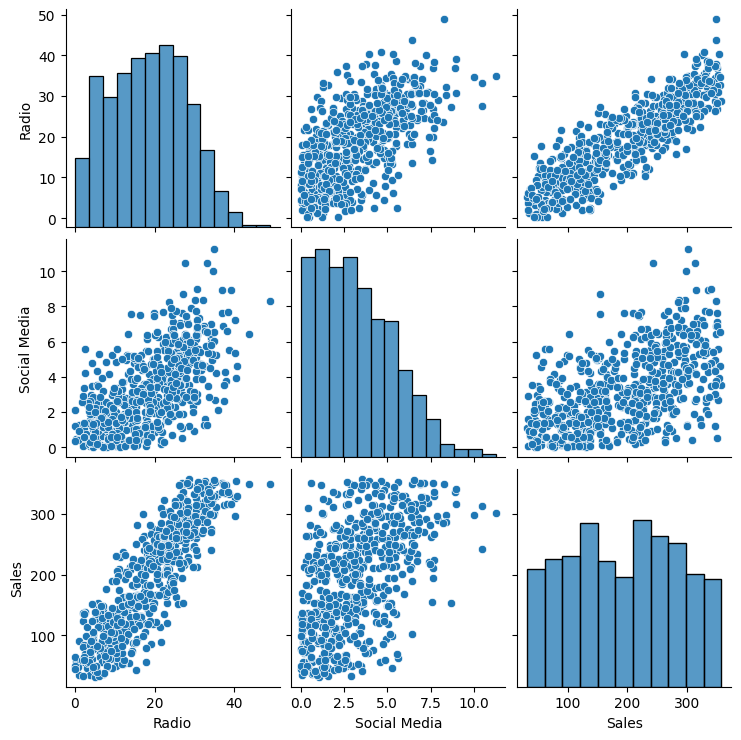

In [25]:
# Exploratory data analysis with seaborn 

sns.pairplot(marketing_data)
plt.show()

In [26]:
# the assumptions of linearity is met with the variables of sales and radio
# X(Independent varible) - Radio (which is radio promotions in millions)
# Y(Dependent variale) - Sales (Total sales in millions)

In [27]:
# Building the model 
ols_data = marketing_data[["Radio", "Sales"]]

In [28]:
# exploring the datafrome
ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [29]:
# writing a regression formula for modeling of the relationship between the variable of
# the two variables of interest.

ols_formula = "Sales ~ Radio"

In [30]:
# Impementing the Ordinary least squares approach for linear regression
OLS = ols(formula=ols_formula, data=ols_data)

#creating the regresion model for the data and fitting the model to the data 
model = OLS.fit()

In [31]:
# printing model results and evaluation 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):          2.07e-176
Time:                        23:35:03   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# the coefficients of the equation 
# Intercept is 41.5326 meaning when X is equal to zero the value of y is 41.5326
# meaing if a company spends zero dollars ( does not spend any money on radio promotions
# ) company sales amount to 41.5326 on average.
# slope is 8.17 meaning for every increase in 1 million  of radio promotion, sales  increases by 8.1733 in milions on average

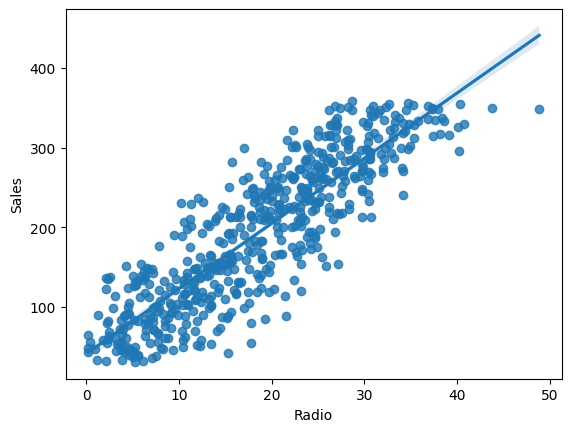

In [38]:
# Checking the assumptions of linearity by plotting the model on a regplot
sns.regplot(x='Radio', y='Sales', data=ols_data)
plt.show()

In [39]:
# The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. 
# This confirms the assumption of linearity.

In [48]:
# Checking for the normality assumption 
# 1. getting residuals from the model 
residuals = model.resid

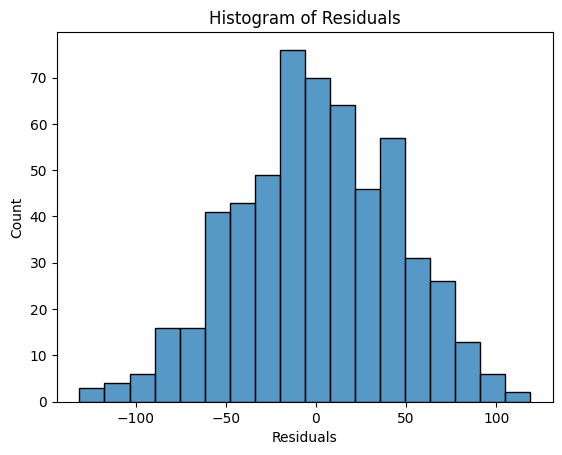

In [49]:
# visualizing a histogram of the residuals
fig = sns.histplot(residuals)

#labelling the model
fig.set_xlabel("Residuals")
fig.set_ylabel("Count")

#title
fig.set_title("Histogram of Residuals")
plt.show()

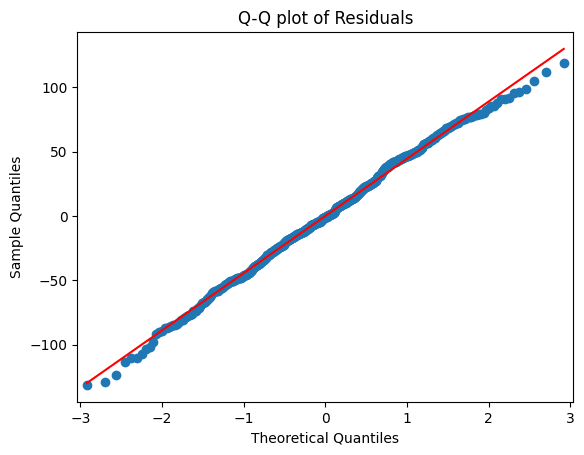

In [44]:
# I am not too sure if it is totally a normal distribution i want to use a Quantile- Quantile plot

#plotting the quantile plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

In [45]:
# checking the assumptions of independent observations and homoscedasticity 
# and independent variable

#getting fitted values fromthe model
fitted_values = model.predict(ols_data["Radio"])

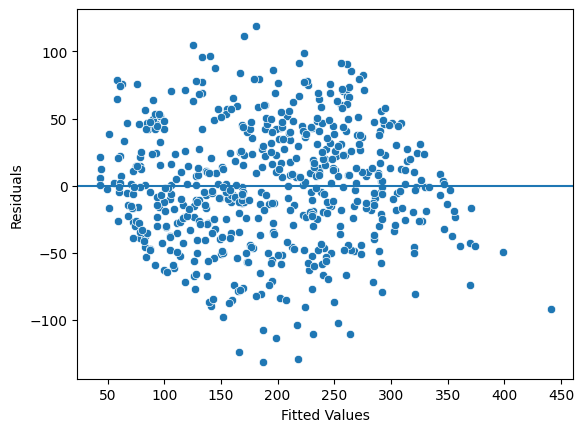

In [47]:
# creating a scatterplot of fitted_values and Residuals 
fig = sns.scatterplot(x=fitted_values, y=residuals)

# reference line = 0 
fig.axhline(0)

# labelling the scatterplot
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

In [ ]:
# we can see a cloud like resemblence and it does not follow any explicit pattern.
# 1. independent observations  assumptions has not been violated
# 2. residuals appear randomly spaced not forming any pattern, the homoscedasticity 
# assumption seems to be met.

What are the results ?

In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average. Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.